## First Model: Sentiment Classification

In [66]:
# Install scikit-learn and pandas if not already installed
!pip install scikit-learn pandas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

# Clone the repo
!git clone https://github.com/dregmi08/Milestone-2-Data-Exploration-Initial-Preprocessing.git

fatal: destination path 'Milestone-2-Data-Exploration-Initial-Preprocessing' already exists and is not an empty directory.


In [59]:
# Dropping Columns

# Grab the csv file and convert to pandas dataframe
spotify_df = pd.read_csv('Milestone-2-Data-Exploration-Initial-Preprocessing/reviews.csv')

# New preprocessing decision: we are not going to make use of the Total_thumbs up column, the ranking in part 2 will
# be decided from the frequency of how often issues are complained about within reviews, and majority of the values in this column (over 60%)
# are 0. Since this doesn't have much relevance in how we decide rankings, we are going to drop this feature
spotify_df = spotify_df.drop(columns="Total_thumbsup")

# Drop the Time_submitted, the time a review submitted is completely irrelevant for ranking features and sentiment classification
spotify_df = spotify_df.drop(columns = ['Time_submitted'])

# Drop the Reply column, it doesn't affect the classification of the sentiment of the review nor would it help in ranking features
# in reviews
spotify_df = spotify_df.drop(columns = ['Reply'])

In [63]:
# Create a function that allows for the sentiment to be mapped properly based on rating
def map_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Create a new column called sentiment, which stores whether the review was positive 
spotify_df['Sentiment'] = spotify_df['Rating'].apply(map_sentiment)

# Split the data into features and target, the review should be our feature, the sentiment should be the target
X = spotify_df['Review']
y = spotify_df['Sentiment']

# Remove all stop words, words that don't carry semantic meaning like "I, and, an"
removed_stop_words = CountVectorizer(stop_words='english') 

# convert raw text into numeric format
X_vectorized = removed_stop_words.fit_transform(X)

# Split into test and train error, training : 80% of data, test: 20%
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 1)

# Use a naive bayes classifier, multinomial is the go-to for text classification
naive_bayes = MultinomialNB()

# Fit and train the model
naive_bayes.fit(X_train, y_train)

# Now, get yhat for the test set
y_hat_test = naive_bayes.predict(X_test)

# Get the classification report for training and testing
train_class_report = classification_report(y_train, y_hat_train)
test_class_report = classification_report(y_test, y_test_pred)

# Print the classification reports
print("\nTraining Classification Report:")
print(train_class_report)

print("\nTesting Classification Report:")
print(test_class_report)


Training Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.90      0.82     19816
     Neutral       0.67      0.15      0.24      5559
    Positive       0.87      0.87      0.87     23900

    accuracy                           0.80     49275
   macro avg       0.76      0.64      0.64     49275
weighted avg       0.79      0.80      0.78     49275


Testing Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.86      0.79      4955
     Neutral       0.22      0.05      0.08      1327
    Positive       0.85      0.86      0.85      6037

    accuracy                           0.77     12319
   macro avg       0.60      0.59      0.57     12319
weighted avg       0.73      0.77      0.74     12319



## False Positives and False Negatives

In [61]:
# Calculate False Positives and False Negatives for training set
train_fp = ((y_hat_train == 'Positive') & (y_train != 'Positive')).sum()  
train_fn = ((y_hat_train != 'Positive') & (y_train == 'Positive')).sum()  
train_tn = ((y_hat_train == 'Negative') & (y_train == 'Negative')).sum()
train_tp = ((y_hat_train == 'Positive') & (y_train == 'Positive')).sum()  

# Calculate False Positives and False Negatives for test set
test_fp = ((y_hat_test == 'Positive') & (y_test != 'Positive')).sum()  
test_fn = ((y_hat_test != 'Positive') & (y_test == 'Positive')).sum()  
test_tn = ((y_hat_test == 'Negative') & (y_test == 'Negative')).sum() 
test_tp = ((y_hat_test == 'Positive') & (y_test == 'Positive')).sum()  

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR) for training set
train_fpr = train_fp / (train_fp + train_tn) if (train_fp + train_tn) != 0 else 0  
train_fnr = train_fn / (train_fn + train_tp) if (train_fn + train_tp) != 0 else 0

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR) for test set
test_fpr = test_fp / (test_fp + test_tn) if (test_fp + test_tn) != 0 else 0 
test_fnr = test_fn / (test_fn + test_tp) if (test_fn + test_tp) != 0 else 0

# Print false positives, false negatives, false positive rate, and false negative rate for both training and testing
print("\nTraining False Positives:", train_fp)
print("Training False Negatives:", train_fn)
print("Training False Positive Rate (FPR):", train_fpr)
print("Training False Negative Rate (FNR):", train_fnr)

print("\nTesting False Positives:", test_fp)
print("Testing False Negatives:", test_fn)
print("Testing False Positive Rate (FPR):", test_fpr)
print("Testing False Negative Rate (FNR):", test_fnr)


Training False Positives: 3234
Training False Negatives: 3116
Training False Positive Rate (FPR): 0.15313950184676578
Training False Negative Rate (FNR): 0.1303765690376569

Testing False Positives: 934
Testing False Negatives: 852
Testing False Positive Rate (FPR): 0.17996146435452795
Testing False Negative Rate (FNR): 0.14112970018220972


## Fitting Graph

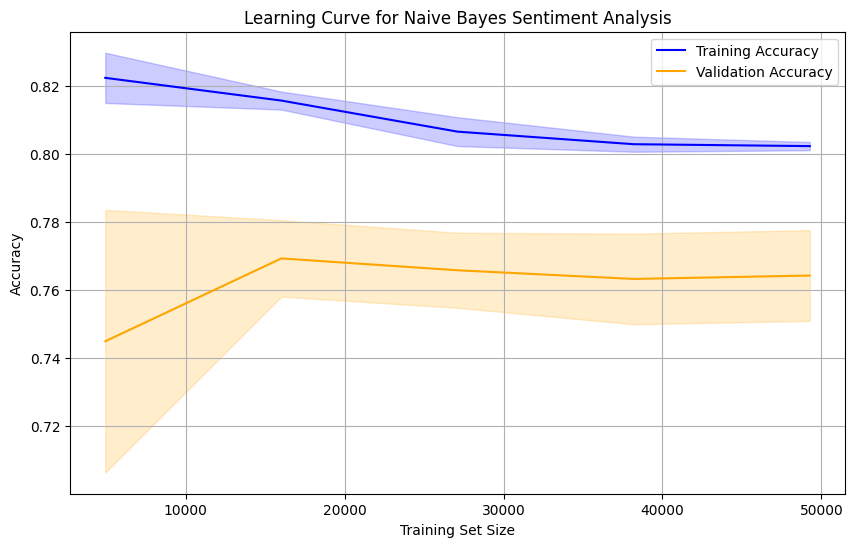

In [68]:
# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(naive_bayes, X_vectorized, y, cv=5, scoring='accuracy')
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, valid_mean, label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color="orange")

plt.title("Learning Curve for Naive Bayes Sentiment Analysis")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()